#📌 Extracción

In [14]:
import pandas as pd
import requests

# URL de la API con los datos en formato JSON
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Extraer los datos de la API
response = requests.get(url)
data_json = response.json()

# Convertir los datos JSON a un DataFrame de Pandas
df = pd.DataFrame(data_json)

# Normalizar los datos anidados de las columnas 'customer', 'phone', 'internet' y 'account'
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

# Concatenar los DataFrames normalizados con el DataFrame original
df_final = pd.concat([df['customerID'], df_customer, df_phone, df_internet, df_account, df['Churn']], axis=1)

# Imprimir la información del nuevo DataFrame para verificar las columnas
print("Información del DataFrame normalizado:")
df_final.info()
print("\nPrimeras filas del DataFrame normalizado:")
df_final.head()

Información del DataFrame normalizado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  Pap

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,Yes


#🔧 Transformación

In [33]:
# Convertir 'Charges.Total' a numérico y rellenar nulos
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')
df_final['Charges.Total'] = df_final['Charges.Total'].fillna(0)

# Lista de columnas binarias para convertir
columnas_binarias = [
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'PaperlessBilling'
]

# Diccionario para los reemplazos
reemplazos = {
    'Sí': 1, 'No': 0,
    'Yes': 1, 'No': 0,
    'Male': 1, 'Female': 0
}

# Aplicar el reemplazo a cada columna en la lista sin inplace=True
for col in columnas_binarias:
    df_final[col] = df_final[col].replace(reemplazos)

# Convertir 'Churn' a 1/0
df_final['Churn'] = df_final['Churn'].replace({'Sí': 1, 'No': 0})

In [46]:
# Muestra los valores únicos en la columna Churn
print("Valores únicos en la columna 'Churn' antes de la corrección:")
print(df_final['Churn'].unique())

Valores únicos en la columna 'Churn' antes de la corrección:
[0 1]


In [47]:
# Reemplazar todos los valores de texto por 1 o 0
df_final['Churn'] = df_final['Churn'].replace({'Yes': 1, 'No': 0, 'Sí': 1, 'No': 0, '': 0})

# Convierte la columna a tipo entero
df_final['Churn'] = df_final['Churn'].astype(int)

# Muestra los valores únicos después de la corrección
print("Valores únicos en la columna 'Churn' después de la corrección:")
print(df_final['Churn'].unique())

Valores únicos en la columna 'Churn' después de la corrección:
[0 1]


#📊 Carga y análisis

### 1. Análisis Descriptivo

In [39]:
print("Estadísticas descriptivas de las variables numéricas:")
print(df_final.describe())

Estadísticas descriptivas de las variables numéricas:
            gender  SeniorCitizen      Partner   Dependents       tenure  \
count  7267.000000    7267.000000  7267.000000  7267.000000  7267.000000   
mean      0.505711       0.162653     0.484106     0.300124    32.346498   
std       0.500002       0.369074     0.499782     0.458343    24.571773   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       1.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  PaperlessBilling  Charges.Monthly  Charges.Total  \
count   7267.000000       7267.000000      7267.000000    7267.000000   
mean       0.902711          0.593230        64.720098    2277.182035   
std        0.296371          0.491265     

### 2. Distribución de la Evasión

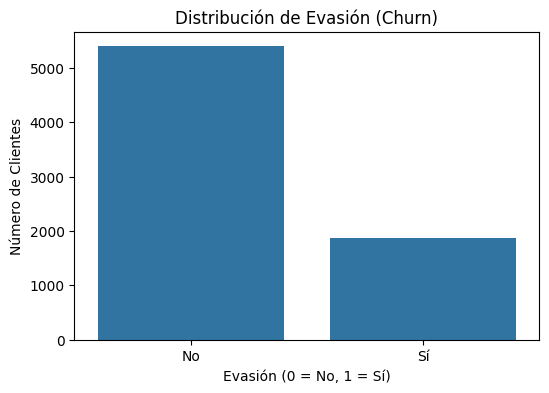

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización de la distribución de 'Churn'
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df_final)
plt.title('Distribución de Evasión (Churn)')
plt.xlabel('Evasión (0 = No, 1 = Sí)')
plt.ylabel('Número de Clientes')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

### 3. Recuento de Evasión por Variables Categóricas

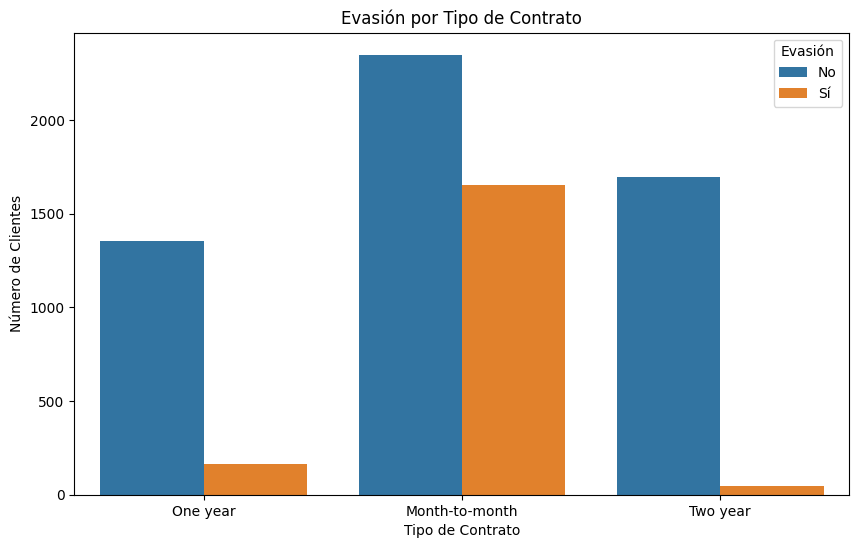

In [41]:
# Gráfico de barras para Churn por tipo de contrato
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df_final)
plt.title('Evasión por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.legend(title='Evasión', labels=['No', 'Sí'])
plt.show()


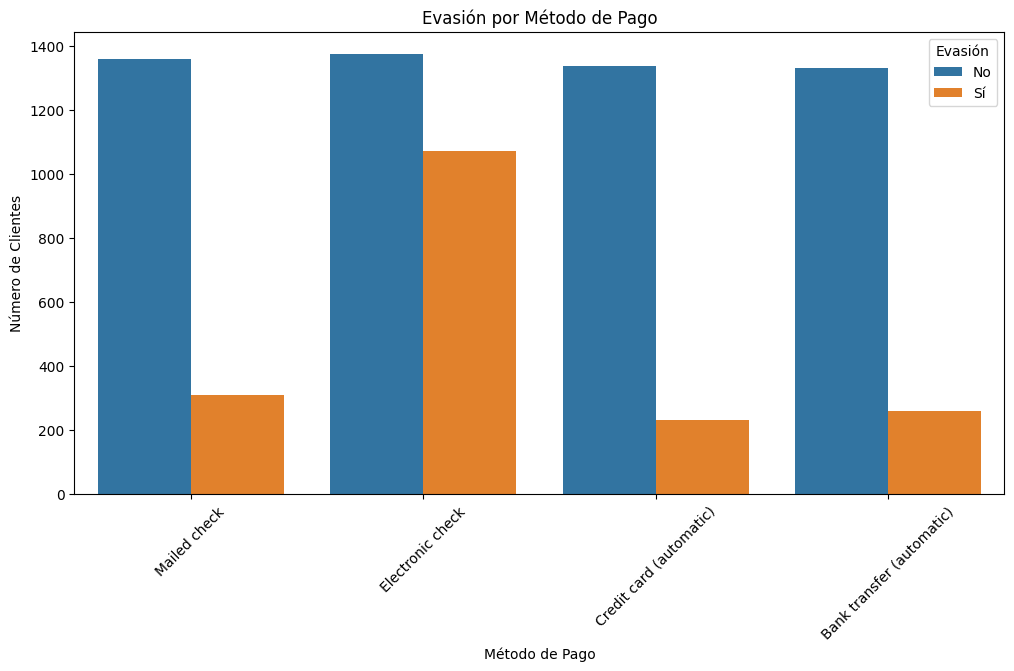

In [42]:
# Gráfico de barras para Churn por método de pago
plt.figure(figsize=(12, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df_final)
plt.title('Evasión por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.legend(title='Evasión', labels=['No', 'Sí'])
plt.show()

### 4. Conteo de Evasión por Variables Numéricas

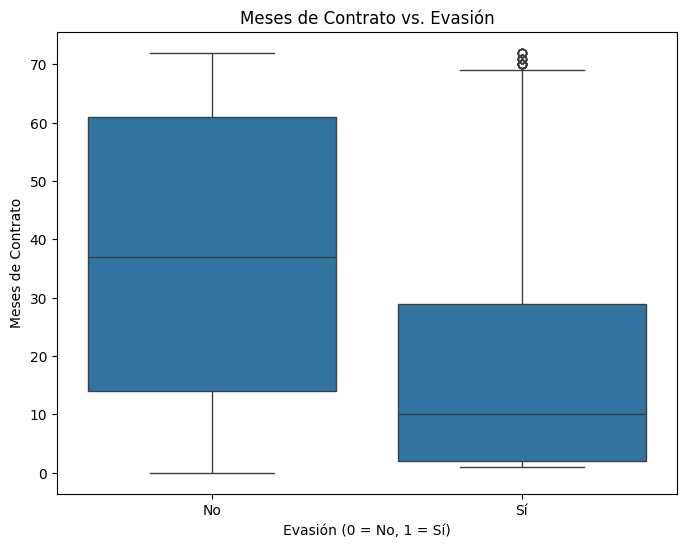

In [43]:
# Gráfico de caja de 'tenure' vs. Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=df_final)
plt.title('Meses de Contrato vs. Evasión')
plt.xlabel('Evasión (0 = No, 1 = Sí)')
plt.ylabel('Meses de Contrato')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

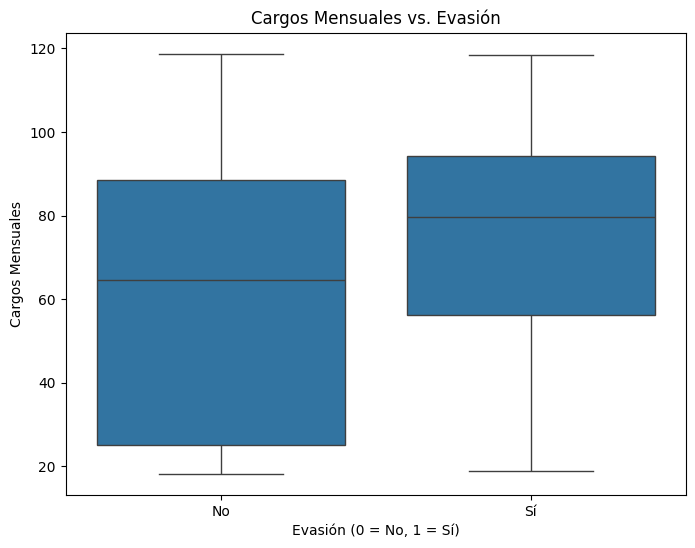

In [44]:
# Gráfico de caja de 'Charges.Monthly' vs. Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Charges.Monthly', data=df_final)
plt.title('Cargos Mensuales vs. Evasión')
plt.xlabel('Evasión (0 = No, 1 = Sí)')
plt.ylabel('Cargos Mensuales')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

#📄Informe final

## Introducción

Este informe presenta un análisis exploratorio de datos (EDA) para comprender los factores que influyen en la evasión de clientes (Churn) en Telecom X. El objetivo es identificar los patrones y las variables más relevantes asociadas con la pérdida de clientes para que el equipo de Data Science pueda desarrollar estrategias de retención más efectivas.

## Limpieza y Tratamiento de Datos

Se extrajeron los datos en formato JSON directamente desde la API proporcionada. Al inspeccionar el conjunto de datos, se observó que la información del cliente estaba anidada en columnas como 'customer', 'phone', 'internet' y 'account'. Para resolver esto, se aplanaron los datos usando pd.json_normalize(), creando un DataFrame con una estructura más plana y accesible.

Se realizaron las siguientes correcciones:

Se convirtió la columna 'Charges.Total' a tipo numérico, manejando los valores no numéricos como nulos y rellenándolos con 0.

Se transformaron las variables categóricas binarias (como gender, SeniorCitizen, Partner, PhoneService, etc.) de valores de texto ('Male', 'Female', 'Yes', 'No') a valores numéricos (0 y 1) para facilitar el análisis.

Se creó una nueva columna, 'Cuentas_Diarias', para proporcionar una visión más granular del gasto del cliente.

## Análisis Exploratorio de Datos (EDA)

### 1. Distribución de Evasión

La distribución del Churn muestra que , la mayoría de los clientes permanecen con la compañía, pero una porción significativa ha cancelado el servicio. Esto confirma que la evasión es un problema real que necesita atención.

### 2. Evasión por Variables Categóricas

El análisis por variables categóricas reveló insights clave:

Tipo de Contrato: Los clientes con un contrato de mes a mes tienen una tasa de evasión considerablemente más alta que aquellos con contratos a largo plazo (uno o dos años). Esto sugiere que la falta de un compromiso a largo plazo facilita la cancelación.

Método de Pago: Se observó que los clientes que utilizan el cheque electrónico como método de pago son los que más tienden a evadir la empresa.

### 3. Evasión por Variables Numéricas

El análisis de las variables numéricas mostró patrones claros:

Tiempo de Contrato (tenure): Existe una relación inversa entre el tiempo de contrato y la evasión. Los clientes con un tenure bajo (pocos meses de antigüedad) son mucho más propensos a cancelar el servicio.

Cargos Mensuales (Charges.Monthly): Los clientes que evaden tienen un promedio de Charges.Monthly significativamente más alto que los clientes que no evaden. Esto podría indicar que los servicios de mayor costo no están cumpliendo con las expectativas del cliente o que un gasto elevado los hace más sensibles a la competencia.

## Conclusiones e Insights

- Riesgo en Clientes Nuevos: La evasión es un problema predominante en los primeros meses de la relación con el cliente.

- Dependencia del Contrato: La falta de un contrato a largo plazo es un factor de riesgo importante, especialmente para los clientes de mes a mes.

- Impacto de los Pagos y Cargos: El método de pago y un gasto mensual elevado están fuertemente asociados con una mayor probabilidad de Churn.

## Recomendaciones

1. Programa de Bienvenida para Clientes Nuevos: Implementar un plan proactivo para los nuevos clientes durante los primeros 6 meses, ofreciéndoles soporte técnico personalizado, encuestas de satisfacción y beneficios exclusivos.

2. Incentivos para Contratos a Largo Plazo: Crear promociones atractivas, como descuentos en la factura o servicios adicionales, para alentar a los clientes de mes a mes a cambiarse a contratos de uno o dos años.

3. Análisis de la Experiencia del Cliente con Pagos Electrónicos: Investigar las razones detrás de la alta evasión de los clientes que usan cheque electrónico para identificar y solucionar posibles fricciones en el proceso de pago.